Observations
- Results on celeb face dataset (grayscale) were similar to mri. Altmin provides blurry but accurate images, dcgan provides detailed but inaccurate
- Data: altmin - samples_face3=no L1, tracking z dist of tracked z's ; samples_face2=L1, tracking z dist of tracked z's ; samples_face=L1, not tracking z dist
- Data: dcgan - samples_face3=tracking diff z's, epoch is 30, tracking z dist of batch; samples_face2=tracking same 4 z's, epoch is 20, tracking z dist of batch
- Z distribution for altmin gan does not really change from random normal

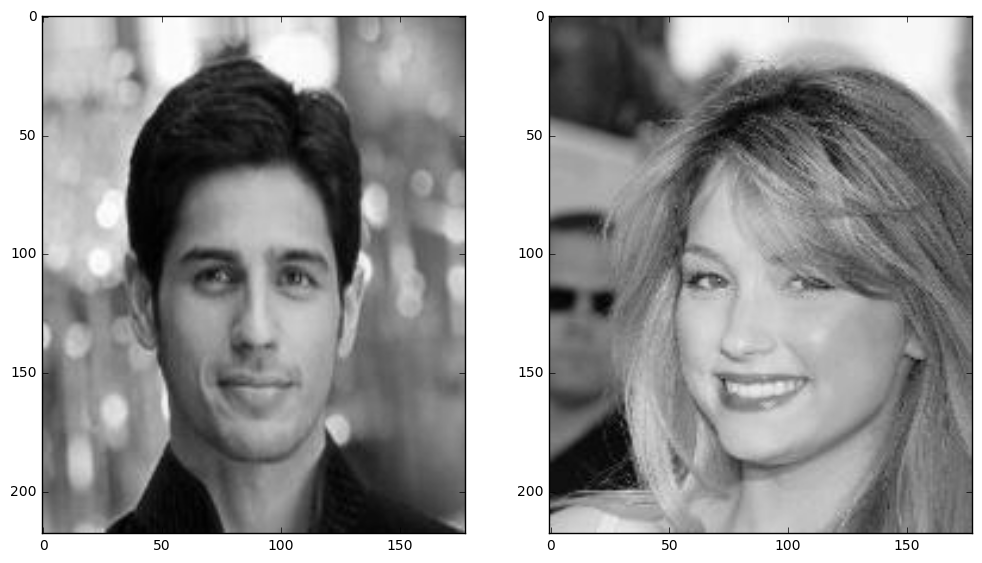

In [3]:
import sys 
sys.path.append('..')
import matplotlib.pyplot as plt
from glob import glob
import ra
import numpy as np
import pylab 
import scipy.stats as stats
from utils import *

def show_images(images, cols = 1):
    n_images = len(images)
    fig = plt.figure()
    for n, image in enumerate(images):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        plt.imshow(image, cmap='gray')
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()
    
# original data
data = glob("../img_align_celeba/*.jpg")[:3000]
np.random.shuffle(data)
img1 = color.rgb2gray(io.imread(data[0]))
img2 = color.rgb2gray(io.imread(data[1]))
show_images([img1, img2])

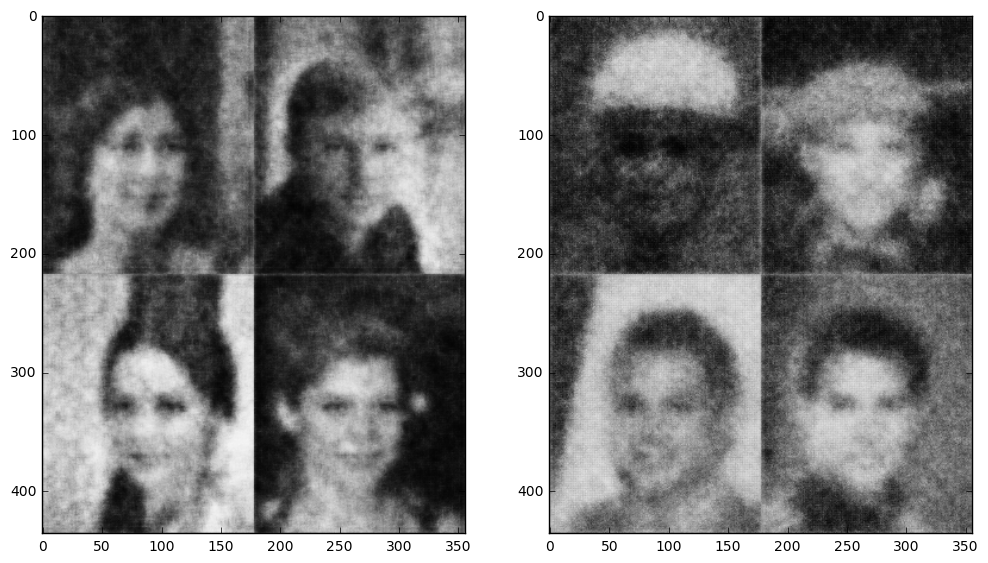

In [4]:
 # altmin results 3. dataset size: 3000, no L1, 2 epochs, batch size: 4. error does converge to ~0.00x
    
altmin = (glob("../recon_gan/samples_face3/*.png"))[-2:]
altmin = [scipy.misc.imread(i) for i in altmin]
show_images(altmin)

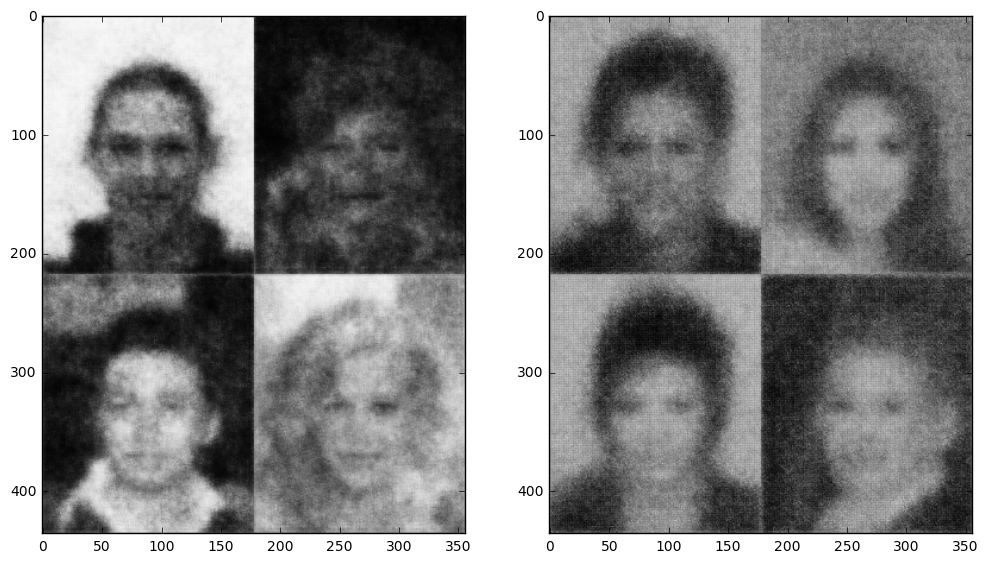

In [5]:
 # altmin results 2. dataset size: 3000, L1, 2 epochs, batch size: 4. error does converge to ~0.00x
    
altmin = (glob("../recon_gan/samples_face2/*.png"))[-2:]
altmin = [scipy.misc.imread(i) for i in altmin]
show_images(altmin)

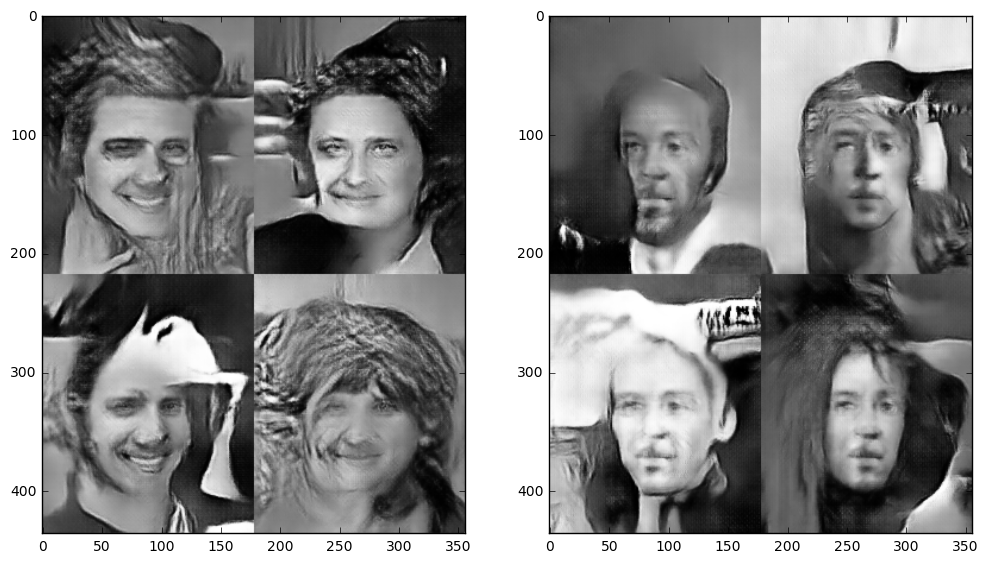

In [6]:
# dcgan results 3.  dataset size: 4, 30 epochs, using different z values for sample generation

dcgan = (glob("../samples_face3/*.png"))[-2:]
dcgan = [scipy.misc.imread(i) for i in dcgan]
show_images(dcgan)

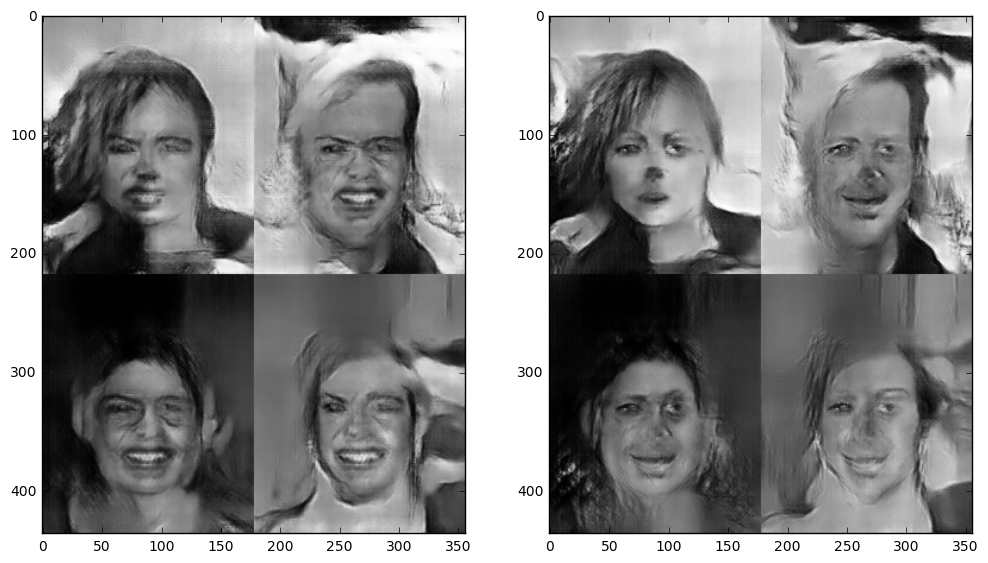

In [7]:
# dcgan results 2.  dataset size: 4, 30 epochs, using same 4 z values for sample generation

dcgan = (glob("../samples_face2/*.png"))[-2:]
dcgan = [scipy.misc.imread(i) for i in dcgan]
show_images(dcgan)

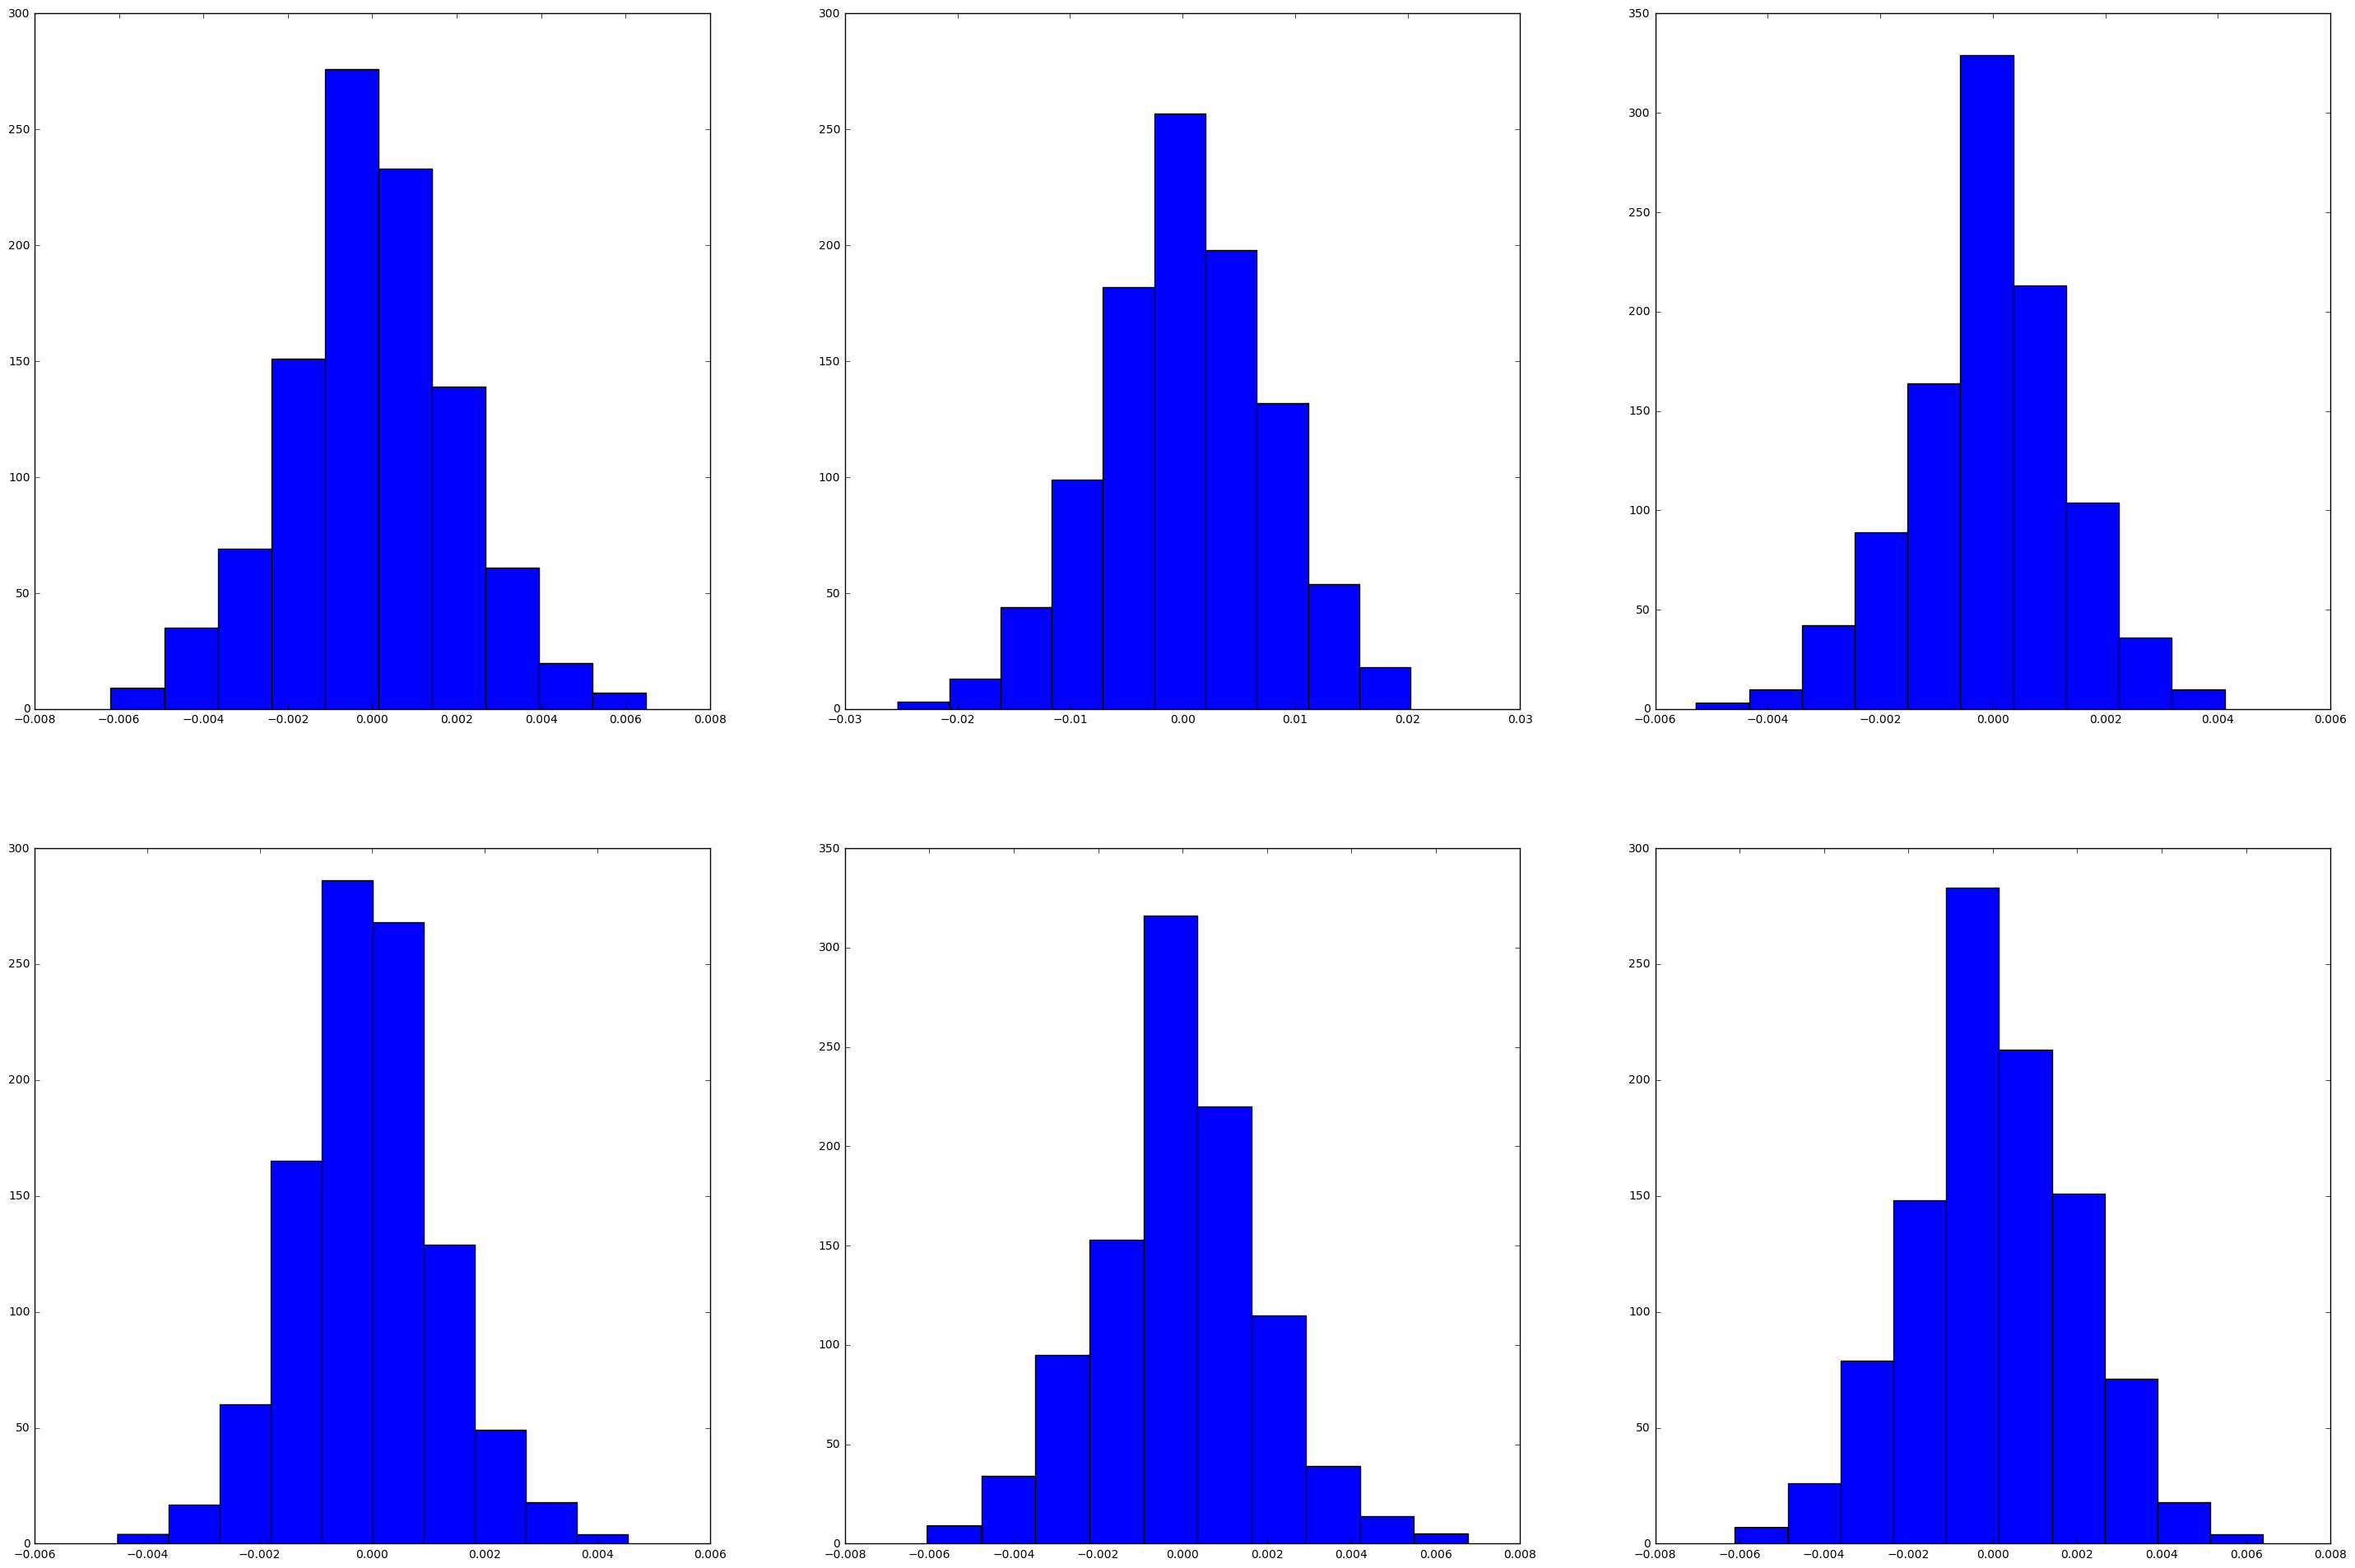

In [13]:
# distribution of trained z's for altmin gan
INDEX = 2
zfiles = (glob("../recon_gan/checkpoints_face2/4_218_178/*.npy"))
zs = [np.load(z) for z in zfiles]

n_plots = len(zs)
fig = plt.figure()
for n, z in enumerate(zs):
    a = fig.add_subplot(2, np.ceil(n_plots) / 2, n + 1)
    plt.hist(z[INDEX])
fig.set_size_inches(np.array(fig.get_size_inches()) * n_plots)
plt.show()

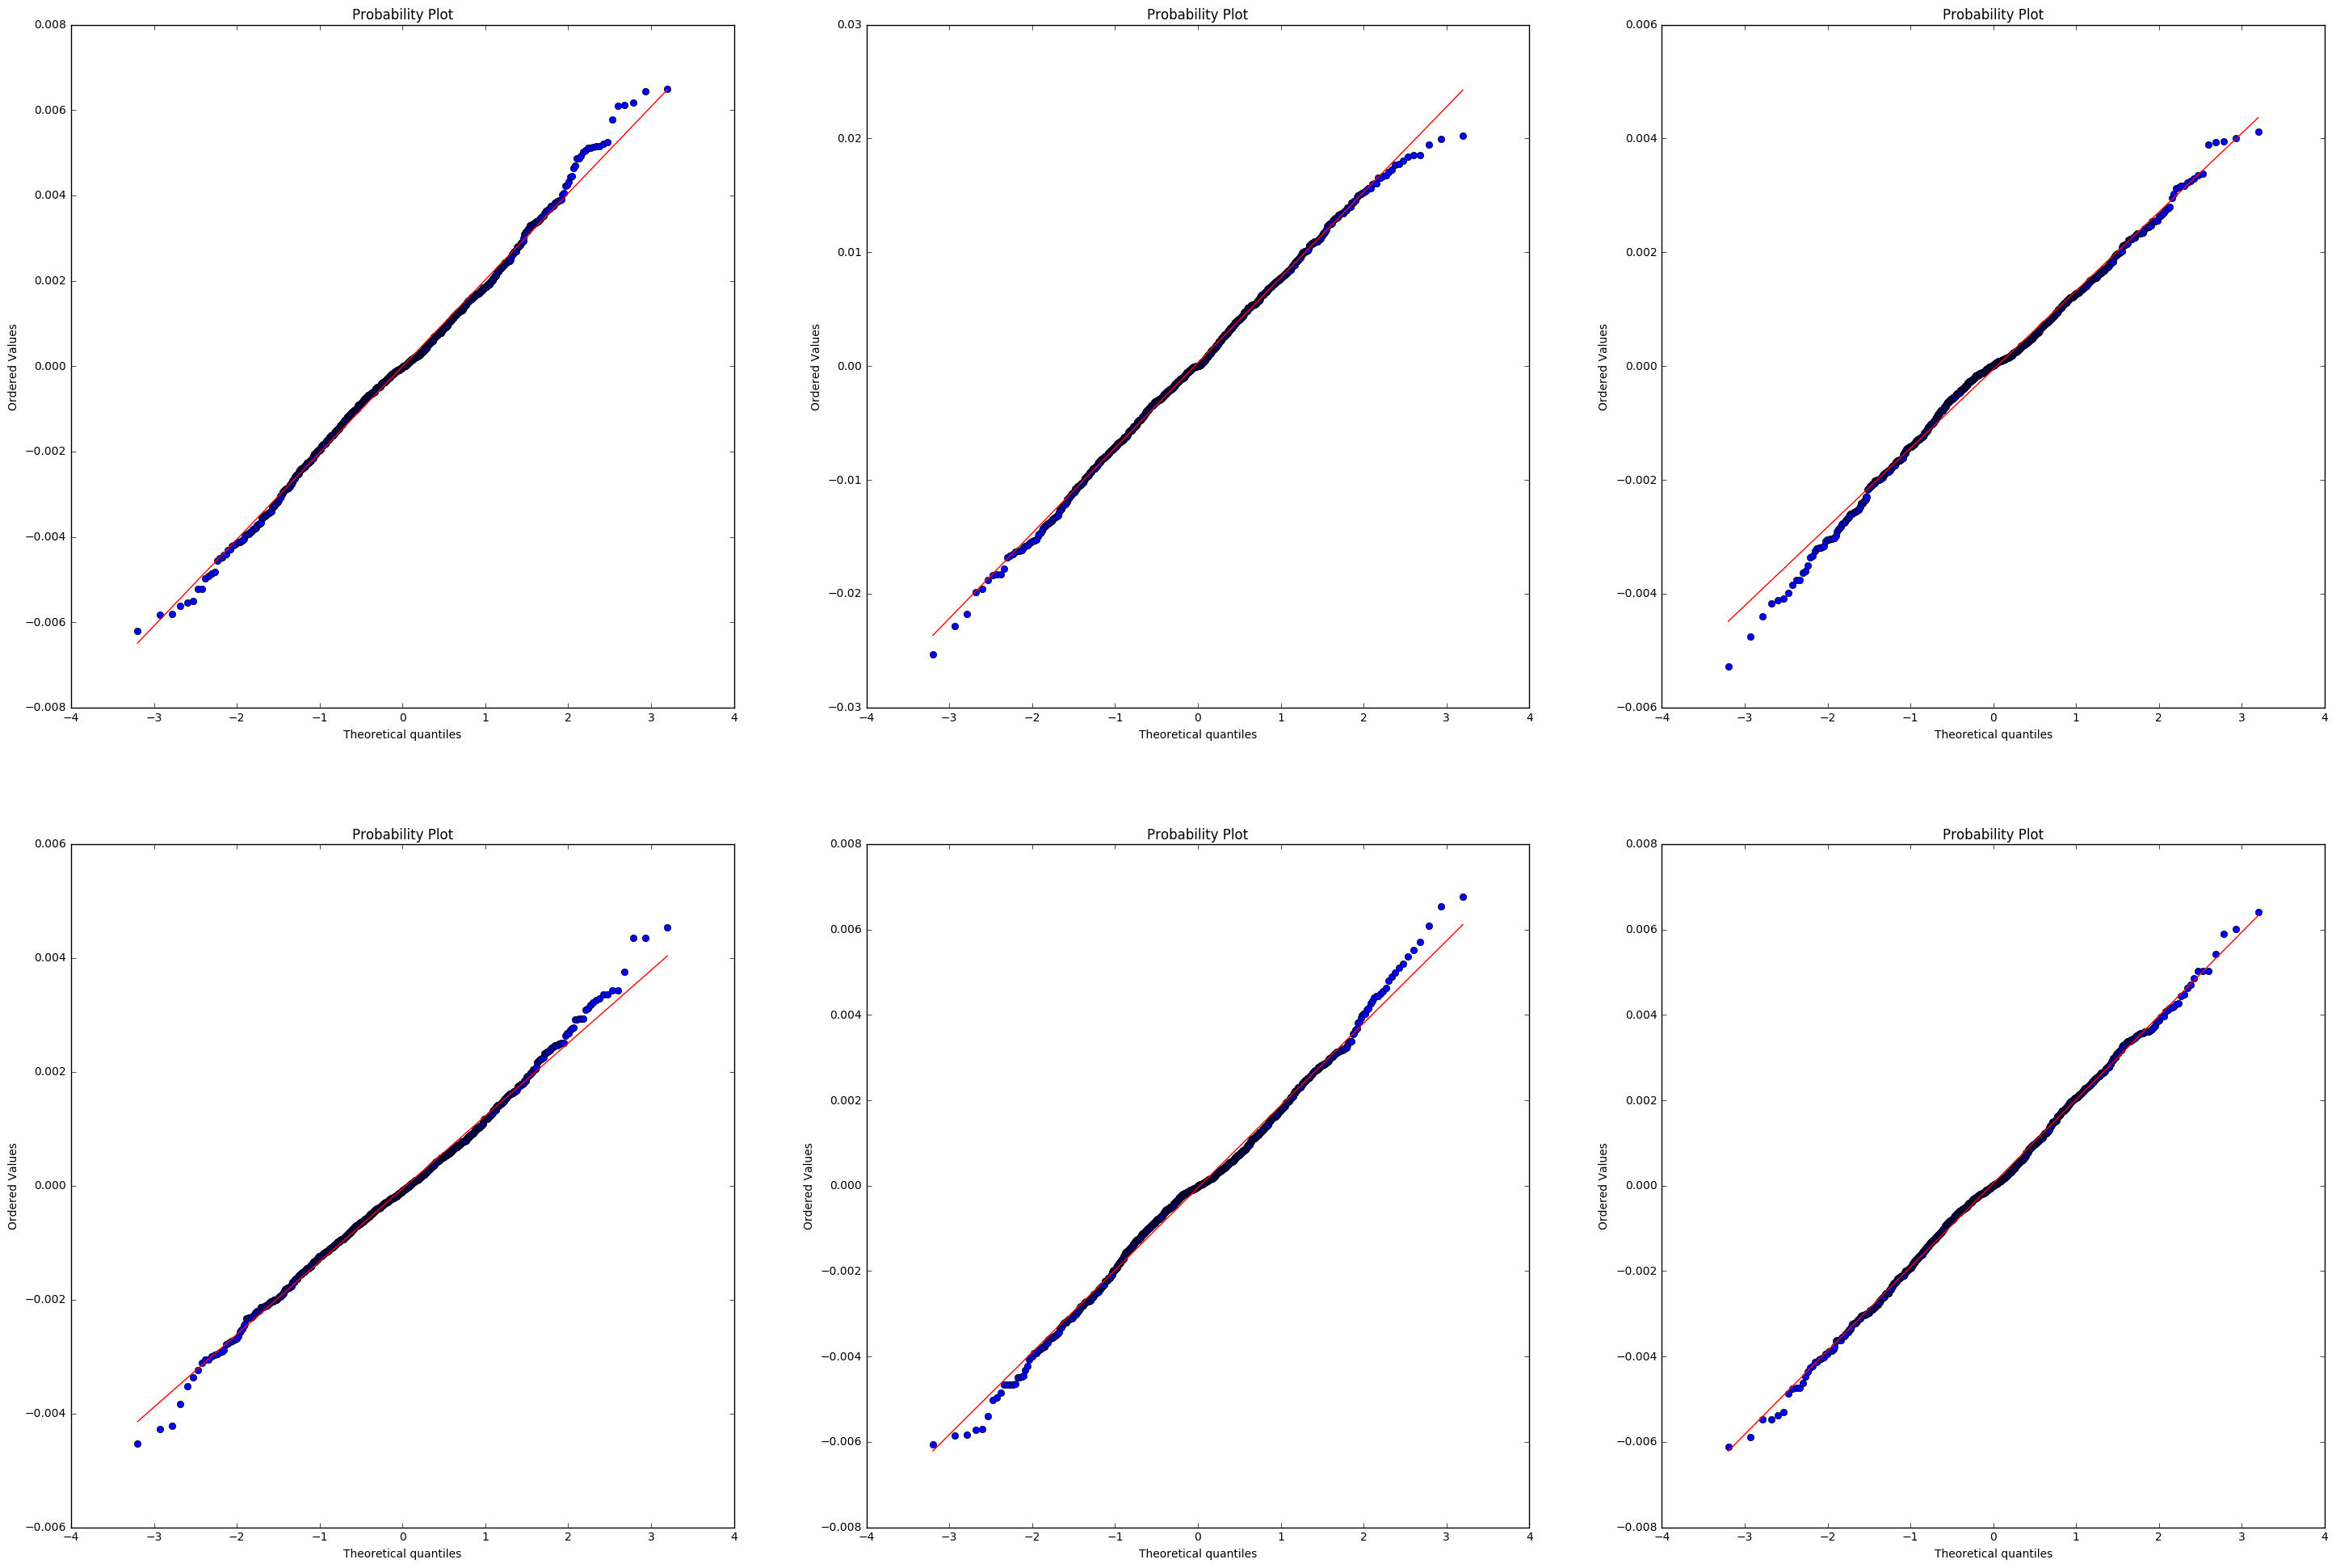

In [15]:
# qq plot for distribution of z's for altmin gan

fig = plt.figure()
for n, z in enumerate(zs):
    a = fig.add_subplot(2, np.ceil(n_plots) / 2, n + 1)
    stats.probplot(z[INDEX], dist="norm", plot=pylab)
fig.set_size_inches(np.array(fig.get_size_inches()) * n_plots)
plt.show()
